In [1]:
import os
os.chdir("../")

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import constants

from src.preprocess.label_parser import LabelParser

In [5]:
TEXT_COLOR = '#313131'
# Plotly colors
LINE_COLORS = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']

sns.set(
    style='darkgrid', 
    rc={'figure.figsize':(6,4),
        'figure.dpi': 100,
        'figure.facecolor': 'w', 
        'legend.facecolor': 'w',
        'text.color': TEXT_COLOR,
        'font.family': 'Microsoft Sans Serif',
        'axes.labelcolor': TEXT_COLOR,
        'xtick.color': TEXT_COLOR,
        'ytick.color': TEXT_COLOR}
)

sns.set_palette(sns.color_palette(LINE_COLORS))

# Parse annotations

In [6]:
label_parser = LabelParser()

In [7]:
label_parser.parse()

In [8]:
all_labels = pd.DataFrame()

folder = "data/labels/parsed_annotations/"
files = [file for file in os.listdir(folder) if not file.startswith(".")]
for file in files:
    labels = pd.read_csv(f"{folder}/{file}")
    all_labels = pd.concat((all_labels, labels))

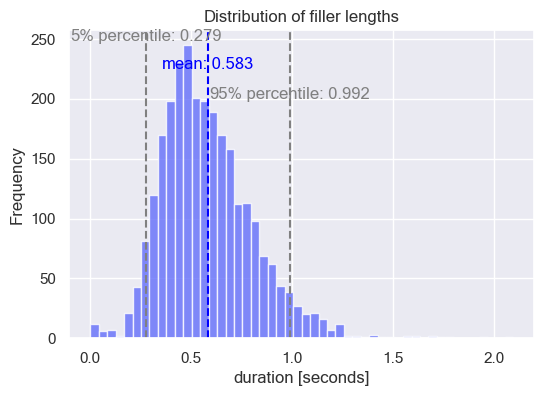

In [9]:
# Plot distribution of target variable
lower_quantile = all_labels["duration"].quantile(0.05)
upper_quantile = all_labels["duration"].quantile(0.95)
mean_duration = all_labels["duration"].mean()

fig, ax = plt.subplots(dpi=100)
all_labels["duration"].plot(kind="hist", bins=50, alpha=0.8, ax=ax)

plt.axvline(x=lower_quantile, ls="--", color="gray")
plt.axvline(x=upper_quantile, ls="--", color="gray")
plt.axvline(x=mean_duration, ls="--", color="blue")

plt.text(x=mean_duration, y=225, s=f"mean: {round(mean_duration, 3)}", color="blue", ha="center")
plt.text(x=lower_quantile, y=248, s=f"5% percentile: {lower_quantile}", color="gray", ha="center")
plt.text(x=upper_quantile, y=200, s=f"95% percentile: {upper_quantile}", color="gray", ha="center")

plt.title("Distribution of filler lengths")
plt.xlabel("duration [seconds]")
plt.savefig(fname="img/target_distribution.jpg", dpi=300, bbox_inches="tight")

In [10]:
# any window length below that is good enough
constants.SAMPLE_RATE * lower_quantile

2232.0

---